In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, MetaData, Table, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
jun_results=session.query(Measurement.date, Measurement.tobs).filter(extract("month",Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
jun_result_list=[]
for result in jun_results:
    jun_result_list.append(result)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
jun_result_df = pd.DataFrame(jun_result_list, columns=['date','June_temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_result_df.describe()

,June_temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results=session.query(Measurement.date, Measurement.tobs).filter(extract("month",Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_result_list=[]
for result in dec_results:
    dec_result_list.append(result)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
import pandas as pd
dec_result_df = pd.DataFrame(dec_result_list, columns=['date','Dec_temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_result_df.describe()

,Dec_temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3: Two additional queries to perform to gather more weather data for Jun and Dec

In [12]:
def month_data(month_digit,session1):
    """this function filters data by month
    
    arguments month_digit:integer 1 to 12
    session 1:connect to database
    return:a filtered dataframe"""
    
    #get data from measurement table
    month=session1.query(Measurement.station, func.avg(Measurement.tobs),func.sum(Measurement.prcp)).\
    filter(extract("month",Measurement.date)==month_digit)\
    .group_by(Measurement.station)\
    .order_by(func.avg(Measurement.tobs).desc(), func.sum(Measurement.prcp).asc()).all()
    list=[]
    for result in month:
        list.append(result)
    measurement_df = pd.DataFrame(list, columns=['station','Ave_temps','Sum_prcp'])
    
    #get data from from station table
    stations=session1.query(Station.station, Station.name).all()
    station_list=[]
    for station in stations:
        station_list.append(station)
    station_df=pd.DataFrame(station_list,columns=['station',"station_name"])
    
    #merge station_df and measurement_df
    result=pd.merge(measurement_df,station_df,how='left',on='station')
    result_df = result.loc[:,['station_name','Ave_temps','Sum_prcp']]
    
    return result_df

In [13]:
result_dec=month_data(12,session)
result_dec

,station_name,Ave_temps,Sum_prcp
0,"KUALOA RANCH HEADQUARTERS 886.9, HI US",73.224719,22.78
1,"WAIMANALO EXPERIMENTAL FARM, HI US",72.433333,33.05
2,"UPPER WAHIAWA 874.3, HI US",72.421053,7.02
3,"PEARL CITY, HI US",71.834862,8.40
4,"WAIKIKI 717.2, HI US",71.109524,15.59
5,"KANEOHE 838.1, HI US",71.069444,43.90
6,"WAIHEE 837.5, HI US",69.903226,53.15
7,"HONOLULU OBSERVATORY 702.2, HI US",69.684211,20.86
8,"MANOA LYON ARBO 785.2, HI US",69.291262,99.88


<AxesSubplot:xlabel='station_name'>

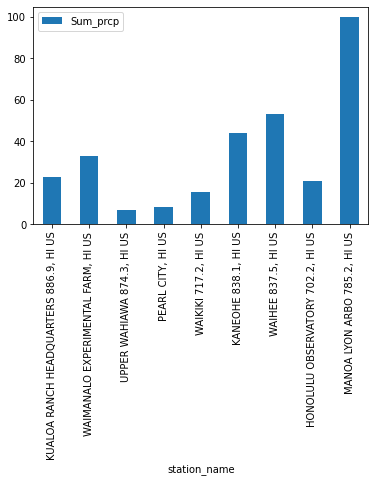

In [14]:
result_dec.plot.bar(x="station_name", y="Sum_prcp")


In [15]:
result_jun=month_data(6,session)
result_jun

,station_name,Ave_temps,Sum_prcp
0,"WAIKIKI 717.2, HI US",77.559322,5.28
1,"WAIMANALO EXPERIMENTAL FARM, HI US",76.668103,11.31
2,"PEARL CITY, HI US",76.655405,4.58
3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",76.005376,19.07
4,"HONOLULU OBSERVATORY 702.2, HI US",74.139394,2.41
5,"KANEOHE 838.1, HI US",74.050847,27.67
6,"UPPER WAHIAWA 874.3, HI US",73.394737,2.46
7,"WAIHEE 837.5, HI US",73.271186,35.76
8,"MANOA LYON ARBO 785.2, HI US",71.937220,106.09


<AxesSubplot:xlabel='station_name'>

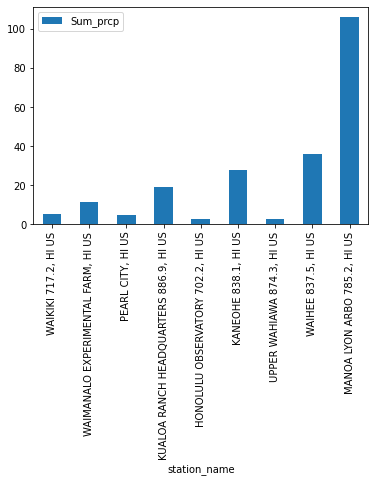

In [16]:
result_jun.plot.bar(x="station_name", y="Sum_prcp")